Applying LSTM for Sentiment Analysis of IMDB Movie Reviews

The IMDB website provided 50K movie reviews for this dataset. This is a binary sentiment classification dataset. Our goal is to use deep learning methods such as LSTM recurrent neural networks or classification techniques to forecast the quantity of positive and negative reviews. We create sequential long short-term memory neural networks (LSTM) with dense layers, LSTM layers, spatial dropout, and embedding for sequence tasks handling sequences of length 250 and utilizing around 5 million parameters.

Dataset: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews




Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from nltk.corpus import stopwords
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

Load Dataset

In [3]:
data = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv.zip')

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data[0:1]

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive


Text Preprocessing

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
STOPWORDS = set(stopwords.words('english'))
def clean_text(text):
  text = text.lower()
  text = ' '.join(word for word in text.split() if word not in STOPWORDS)
  text = re.sub(r'\W', ' ',text)
  text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
  text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
  text = re.sub(r'\s+', ' ', text, flags=re.I)
  return text
data['review'] = data['review'].apply(clean_text)



In [8]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

Tokenization and Sequence Padding

In [9]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['review'].values)
word_index = tokenizer.word_index

X = tokenizer.texts_to_sequences(data['review'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

print('Shape of data tensor:', X.shape)

Shape of data tensor: (50000, 250)


In [10]:
X[0][249]

405

Prepare Labels and split data in training and testing sets

In [11]:
# Prepare labels and split the data
Y = pd.get_dummies(data['sentiment']).values
print('Shape of data tensor', Y.shape)
print(Y[1883])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

Shape of data tensor (50000, 2)
[ True False]
(40000, 250) (40000, 2)
(10000, 250) (10000, 2)


Define and Train Model

In [12]:
  # Define and train the model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

epochs = 5
batch_size = 64



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 250, 100)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 2)                 202       
                                                                 
Total params: 5080602 (19.38 MB)
Trainable params: 5080602 (19.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [13]:
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/5
563/563 [==============================] - 539s 946ms/step - loss: 0.3401 - accuracy: 0.8508 - val_loss: 0.2781 - val_accuracy: 0.8867
Epoch 2/5
563/563 [==============================] - 490s 870ms/step - loss: 0.1635 - accuracy: 0.9414 - val_loss: 0.2872 - val_accuracy: 0.8848
Epoch 3/5
563/563 [==============================] - 478s 850ms/step - loss: 0.0951 - accuracy: 0.9678 - val_loss: 0.3569 - val_accuracy: 0.8907
Epoch 4/5
563/563 [==============================] - 465s 827ms/step - loss: 0.0648 - accuracy: 0.9774 - val_loss: 0.3997 - val_accuracy: 0.8835
Epoch 5/5
563/563 [==============================] - 463s 822ms/step - loss: 0.0504 - accuracy: 0.9839 - val_loss: 0.4227 - val_accuracy: 0.8870


Plotting Curves

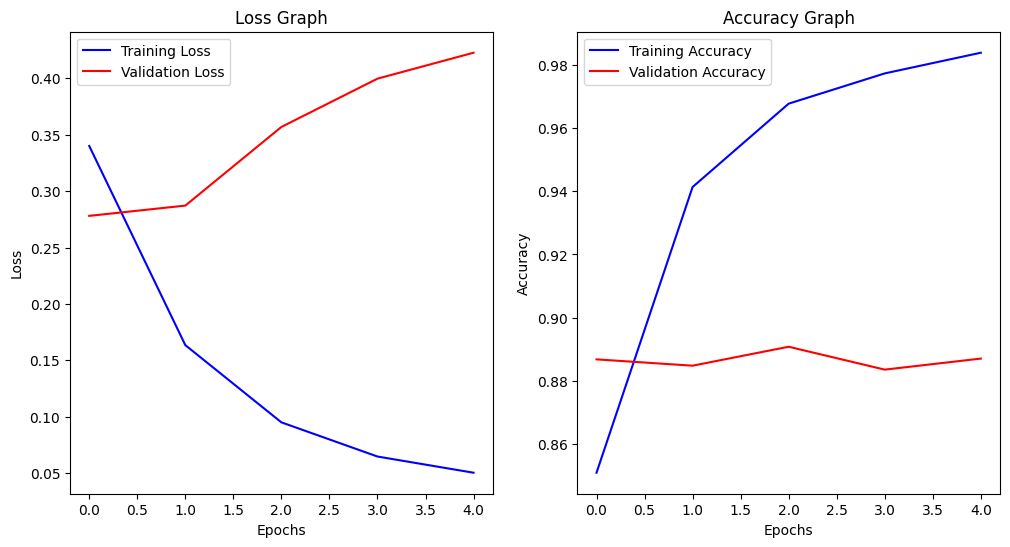

313/313 [==============================] - 26s 80ms/step


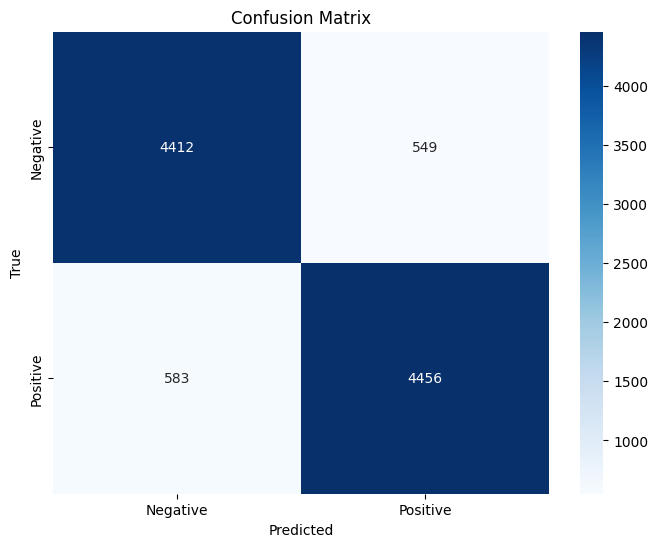

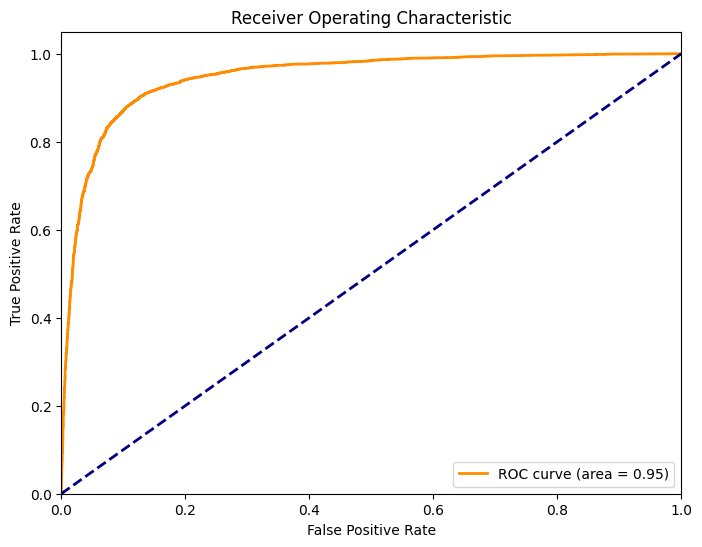

In [18]:
# Plot the loss and accuracy for training and validation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
# Get model predictions
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_true, Y_pred[:, 1])
roc_auc = auc(fpr, tpr)



# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [19]:
from sklearn.metrics import roc_auc_score

# Calculate AUC-ROC score
roc_auc = roc_auc_score(Y_true, Y_pred[:, 1])
print(f'AUC-ROC Score: {roc_auc:.3f}')

AUC-ROC Score: 0.947


Validate the model

In [20]:
# Validate the model
accr = model.evaluate(X_test, Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))

313/313 [==============================] - 23s 73ms/step - loss: 0.4059 - accuracy: 0.8868
Test set
  Loss: 0.406
  Accuracy: 0.887
